# Task 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Reading csv file

In [4]:
df = pd.read_csv("shopper.csv")

In [106]:
df.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


## Imputing Missing Data

In [5]:
Age_mean=df.Age.mean()
Income_mean=df.Income.mean()
df['Age']=df['Age'].fillna(Age_mean)
df['Income']=df['Income'].fillna(Income_mean)
df

,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


## Visualizing Data

<AxesSubplot:xlabel='Age', ylabel='Income'>

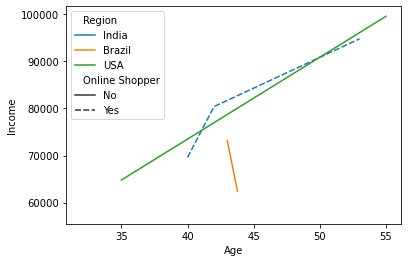

In [6]:
sns.lineplot(data=df, x="Age", y="Income", hue="Region",style="Online Shopper")

## Label Encoding for Categorical Data

In [7]:
le = LabelEncoder()
df["Region"] = le.fit_transform(df["Region"])

In [8]:
df

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,No
1,0,32.000000,57600.000000,Yes
2,2,35.000000,64800.000000,No
3,0,43.000000,73200.000000,No
4,2,45.000000,76533.333333,Yes
5,1,40.000000,69600.000000,Yes
6,0,43.777778,62400.000000,No
7,1,53.000000,94800.000000,Yes
8,2,55.000000,99600.000000,No
9,1,42.000000,80400.000000,Yes


In [9]:
df["Online Shopper"] = le.fit_transform(df["Online Shopper"])
df

,Region,Age,Income,Online Shopper
0,1,49.000000,86400.000000,0
1,0,32.000000,57600.000000,1
2,2,35.000000,64800.000000,0
3,0,43.000000,73200.000000,0
4,2,45.000000,76533.333333,1
5,1,40.000000,69600.000000,1
6,0,43.777778,62400.000000,0
7,1,53.000000,94800.000000,1
8,2,55.000000,99600.000000,0
9,1,42.000000,80400.000000,1


## Feature Scaling using StandardScalar

In [10]:
scaler = StandardScaler()
df =scaler.fit_transform(df)

In [11]:
df

array([[ 0.        ,  0.75887436,  0.74947325, -1.        ],
       [-1.29099445, -1.71150388, -1.43817841,  1.        ],
       [ 1.29099445, -1.27555478, -0.89126549, -1.        ],
       [-1.29099445, -0.11302384, -0.25320042, -1.        ],
       [ 1.29099445,  0.17760889,  0.        ,  1.        ],
       [ 0.        , -0.54897294, -0.52665688,  1.        ],
       [-1.29099445,  0.        , -1.0735698 , -1.        ],
       [ 0.        ,  1.34013983,  1.38753832,  1.        ],
       [ 1.29099445,  1.63077256,  1.75214693, -1.        ],
       [ 0.        , -0.25834021,  0.29371249,  1.        ]])

In [97]:
type(df)

numpy.ndarray

In [12]:
X=df[:,:-1]
y = df[:,-1]

## Splitting into training and testing data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Task 2

In [222]:
movie_df = pd.read_csv("/content/movie_metadata.csv")

In [223]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


## Imputing Missing values (Numerical and Categorical)


In [224]:
movie_df.isna().sum() # Number of null values in each column

color                          8
director_name                 65
num_critic_for_reviews        11
duration                       4
director_facebook_likes       65
actor_3_facebook_likes         6
actor_2_name                   4
actor_1_facebook_likes         0
gross                        297
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   6
facenumber_in_poster           5
plot_keywords                 44
movie_imdb_link                0
num_user_for_reviews           9
language                       5
country                        5
content_rating                84
budget                       227
title_year                    70
actor_2_facebook_likes         5
imdb_score                     1
aspect_ratio                  78
movie_facebook_likes           1
dtype: int64

In [225]:
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [221]:
def MeanImputation(df,col):
  df[col]=mean_imp.fit_transform(movie_df[col].values.reshape(-1,1))

In [232]:
def CategoricalDataImputation(df,col):
  df[col] = movie_df.fillna(movie_df[col].value_counts().index[0])

In [234]:
## List of cols for mean imputation
mean_list = ["gross","budget","title_year","aspect_ratio","movie_facebook_likes",
             "imdb_score","actor_2_facebook_likes","facenumber_in_poster","num_critic_for_reviews",
             "num_user_for_reviews","director_facebook_likes","actor_3_facebook_likes","duration"
             ]
# List of cols with categorical data for imputation
cat_list = ["director_name","color","content_rating","language","country","actor_2_name","actor_3_name",
            "plot_keywords"]


In [235]:
for i in mean_list:
  MeanImputation(movie_df,i)

for j in cat_list:
  CategoricalDataImputation(movie_df,j)

In [236]:
movie_df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [237]:
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3.474000e+03,3.474000e+03,3474.000000,3474.000000,3474.000000,3.474000e+03,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000
mean,162.425931,110.924784,823.051628,806.860727,7929.283535,5.925837e+07,1.057771e+05,11877.473230,1.422312,329.738528,5.161459e+07,2003.611340,2119.942346,6.423150,2.225542,9339.803340
std,124.594946,26.318551,3062.785093,1947.824845,15289.805224,6.985295e+07,1.539662e+05,19050.847836,2.077834,413.101846,2.227023e+08,9.233117,4645.090166,1.073101,1.132362,21922.456965
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,6.000000e+00,0.000000,0.000000,1.000000,1.300000e+04,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,72.000000,96.000000,12.000000,214.250000,787.000000,1.519853e+07,1.870350e+04,2040.000000,0.000000,102.000000,1.700000e+07,1999.000000,416.000000,5.800000,1.850000,0.000000
50%,133.000000,107.000000,70.000000,460.000000,2000.000000,4.090855e+07,5.329600e+04,4347.000000,1.000000,203.000000,3.200000e+07,2005.000000,719.000000,6.500000,2.350000,209.000000
75%,219.000000,122.000000,272.000000,718.000000,13000.000000,7.020906e+07,1.284178e+05,16692.750000,2.000000,391.000000,5.500000e+07,2010.000000,990.500000,7.200000,2.350000,11000.000000
max,813.000000,511.000000,22000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## Encoding Categorical Data

In [238]:
movie_df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes         int64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [239]:
le = LabelEncoder()

In [240]:
for i in movie_df.columns:
  if(type(movie_df[i]=="object")):
    movie_df[i] = le.fit_transform(movie_df[i])

In [241]:
movie_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,1,510,130,0,747,1,617,3114,96,165,263,3385,1495,1,0,1,2138,909,1,1,1,259,52,751,62,6,528
1,1,1,301,121,305,842,1,650,3064,90,631,1858,3290,2955,1,0,1,1960,810,1,1,1,265,50,804,54,12,0
2,1,1,493,100,0,155,1,627,2960,113,226,2236,3089,1818,1,1,1,3224,750,1,1,1,260,58,326,51,12,577
3,1,1,517,116,375,861,1,643,3106,253,1239,2540,3395,3058,1,0,1,2723,900,1,1,1,261,55,822,68,12,613
4,1,2,162,62,122,709,1,59,2099,624,351,2281,1,43,1,0,1,3411,327,1,1,1,158,46,11,54,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,1,1,82,73,229,10,1,617,1692,681,479,2895,1901,302,1,1,1,365,240,1,1,1,24,35,15,59,7,0
3470,1,1,321,61,0,852,1,633,2665,513,191,1525,2419,2944,1,1,1,3076,279,1,1,1,24,55,814,43,12,549
3471,1,1,139,47,284,80,1,617,1434,729,1182,646,1070,749,1,0,1,1305,366,1,1,1,56,45,779,31,12,496
3472,1,1,135,73,80,180,1,304,1546,113,1298,1475,2058,618,1,4,1,43,250,1,1,1,24,15,449,51,4,0


## Feature Scaling

In [244]:
def min_max_scaling(df):
  df_copy = df.copy()
  for col in df_copy.columns:
    df_copy[col] = (df_copy[col]-df_copy[col].min())/(df_copy[col].max()-df_copy[col].min())
  return df_copy

In [245]:
movie_df = min_max_scaling(movie_df)

In [246]:
X = movie_df.iloc[:,:-1]
y = movie_df.iloc[:,-1]
X

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
0,1.0,0.5,0.986460,0.755814,0.000000,0.867596,1.0,0.937690,1.000000,0.129380,0.125571,0.077126,0.994126,0.487924,1.0,0.000000,1.0,0.626796,0.991276,1.0,1.0,1.0,0.941818,0.881356,0.909201,0.805195,0.352941
1,1.0,0.5,0.582205,0.703488,0.813333,0.977933,1.0,0.987842,0.983943,0.121294,0.480213,0.544868,0.966226,0.964426,1.0,0.000000,1.0,0.574612,0.883315,1.0,1.0,1.0,0.963636,0.847458,0.973366,0.701299,0.705882
2,1.0,0.5,0.953578,0.581395,0.000000,0.180023,1.0,0.952888,0.950546,0.152291,0.171994,0.655718,0.907195,0.593342,1.0,0.052632,1.0,0.945177,0.817884,1.0,1.0,1.0,0.945455,0.983051,0.394673,0.662338,0.705882
3,1.0,0.5,1.000000,0.674419,1.000000,1.000000,1.0,0.977204,0.997431,0.340970,0.942922,0.744868,0.997063,0.998042,1.0,0.000000,1.0,0.798300,0.981461,1.0,1.0,1.0,0.949091,0.932203,0.995157,0.883117,0.705882
4,1.0,1.0,0.313346,0.360465,0.325333,0.823461,1.0,0.089666,0.674053,0.840970,0.267123,0.668915,0.000294,0.014034,1.0,0.000000,1.0,1.000000,0.356598,1.0,1.0,1.0,0.574545,0.779661,0.013317,0.701299,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,1.0,0.5,0.158607,0.424419,0.610667,0.011614,1.0,0.937690,0.543353,0.917790,0.364536,0.848974,0.558297,0.098564,1.0,0.052632,1.0,0.107007,0.261723,1.0,1.0,1.0,0.087273,0.593220,0.018160,0.766234,0.411765
3470,1.0,0.5,0.620890,0.354651,0.000000,0.989547,1.0,0.962006,0.855812,0.691375,0.145358,0.447214,0.710426,0.960836,1.0,0.052632,1.0,0.901788,0.304253,1.0,1.0,1.0,0.087273,0.932203,0.985472,0.558442,0.705882
3471,1.0,0.5,0.268859,0.273256,0.757333,0.092915,1.0,0.937690,0.460501,0.982480,0.899543,0.189443,0.314244,0.244452,1.0,0.000000,1.0,0.382586,0.399128,1.0,1.0,1.0,0.203636,0.762712,0.943099,0.402597,0.705882
3472,1.0,0.5,0.261122,0.424419,0.213333,0.209059,1.0,0.462006,0.496468,0.152291,0.987823,0.432551,0.604405,0.201697,1.0,0.210526,1.0,0.012606,0.272628,1.0,1.0,1.0,0.087273,0.254237,0.543584,0.662338,0.235294


## Splitting to train-test

In [247]:
train_X,test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=40)